# ELT (Extract - Transform - Load) Process 
##### on Zillow Home Value Data for Cities in the US
*By Harsh Patel*

# Extract
Extracting data from a data source and holding it on Pandas Dataframe.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
homeval_df = pd.read_csv('zillow_zhvi.csv')
homeval_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,127202.0,127546.0,127908.0,128645.0,129389.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,1,"New York, NY",Msa,NY,224341.0,225681.0,226887.0,229261.0,231472.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231193.0,231998.0,233231.0,235576.0,238089.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,394463,3,"Chicago, IL",Msa,IL,170104.0,170505.0,171024.0,172064.0,173166.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130035.0,130139.0,130225.0,130437.0,130658.0,...,276637.0,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,81702.0,82847.0,84199.0,84499.0,84998.0,85445.0,86421.0,87549.0,88609.0,89544.0
904,753874,930,"Craig, CO",Msa,CO,94741.0,95085.0,95668.0,96360.0,97075.0,...,NaN,214132.0,219224.0,223021.0,226345.0,229787.0,232861.0,236543.0,239833.0,242809.0
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,136993.0,139388.0,141606.0,143469.0,145612.0,147618.0,150033.0,155032.0,159714.0,164353.0
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,70218.0,71261.0,71623.0,72008.0,72666.0,73363.0,73961.0,74432.0,74762.0


### Cleaning data

In [3]:
homeval_df['StateName'] = homeval_df['StateName'].fillna('US')
homeval_df = homeval_df.dropna() # dropping cities with null values
homeval_df = homeval_df.drop(columns=['RegionType', 'SizeRank']) # dropping unwanted columns
homeval_df.reset_index(drop=True, inplace=True)
homeval_df

,RegionID,RegionName,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,United States,US,127202.0,127546.0,127908.0,128645.0,129389.0,130130.0,130886.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,"New York, NY",NY,224341.0,225681.0,226887.0,229261.0,231472.0,233825.0,236298.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",CA,231193.0,231998.0,233231.0,235576.0,238089.0,240463.0,242893.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,394463,"Chicago, IL",IL,170104.0,170505.0,171024.0,172064.0,173166.0,174257.0,175465.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,394514,"Dallas-Fort Worth, TX",TX,130035.0,130139.0,130225.0,130437.0,130658.0,130843.0,131042.0,...,276637.0,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,394564,"Elk City, OK",OK,65192.0,64921.0,64875.0,64753.0,64811.0,64828.0,64878.0,...,113073.0,112195.0,111512.0,112430.0,113522.0,116771.0,119689.0,122682.0,123241.0,123974.0
403,395135,"Storm Lake, IA",IA,70406.0,70669.0,70827.0,71218.0,71496.0,71703.0,71911.0,...,129849.0,130699.0,131744.0,132088.0,133051.0,134053.0,134996.0,135902.0,137116.0,137863.0
404,395236,"Woodward, OK",OK,58325.0,58372.0,58412.0,58530.0,58644.0,58758.0,58910.0,...,110379.0,111527.0,113083.0,114140.0,114990.0,115825.0,116762.0,117534.0,118184.0,118771.0
405,394594,"Fitzgerald, GA",GA,50052.0,49802.0,49748.0,49506.0,49441.0,49383.0,49668.0,...,82835.0,83817.0,85050.0,85737.0,86752.0,87804.0,88761.0,89351.0,89937.0,90355.0


# Transform
Changing the format, structure, and values of data.

### How has the median home price in the US changed from 2000-2021?

In [4]:
# US homeval with time
us_homeval = pd.DataFrame(homeval_df.drop(columns=['StateName', 'RegionName', 'RegionID']).loc[0,:])
us_homeval.reset_index(inplace=True)
#us_homeval.rename(columns={'index':'date'}, inplace=True)
us_homeval.columns = ['date', 'United States']
us_homeval['date'] = pd.to_datetime(us_homeval['date'], format='%Y-%m-%d')
us_homeval.set_index('date', inplace=True) #setting index to date column
us_homeval

,United States
date,
2000-01-31,127202.0
2000-02-29,127546.0
2000-03-31,127908.0
2000-04-30,128645.0
2000-05-31,129389.0
...,...
2021-06-30,292730.0
2021-07-31,298613.0
2021-08-31,304008.0


<AxesSubplot:xlabel='date'>

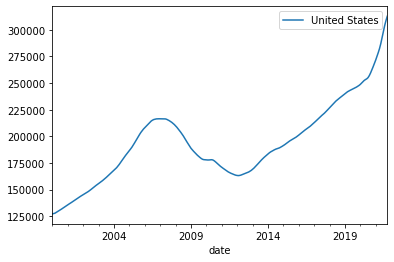

In [5]:
transform_1 = us_homeval.copy()
transform_1.plot()

##### Adding Top 25 cities to the table

In [6]:
for i in range(1, 26):
    us_homeval.insert(us_homeval.columns.size, homeval_df.loc[i, 'RegionName'], pd.DataFrame(homeval_df.drop(columns=['StateName', 'RegionName', 'RegionID']).loc[i,:]).values)

In [7]:
us_homeval

,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Minneapolis-St Paul, MN","San Diego, CA","St. Louis, MO","Tampa, FL","Baltimore, MD","Denver, CO","Portland, OR","Charlotte, NC","Sacramento, CA","San Antonio, TX"
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,127202.0,224341.0,231193.0,170104.0,130035.0,129808.0,125307.0,192179.0,126205.0,153251.0,...,153863.0,227696.0,114922.0,104246.0,155539.0,197831.0,178954.0,148604.0,172717.0,118126.0
2000-02-29,127546.0,225681.0,231998.0,170505.0,130139.0,130243.0,125385.0,192425.0,126670.0,153761.0,...,154632.0,228935.0,115142.0,104454.0,155715.0,199172.0,179636.0,148934.0,173373.0,118313.0
2000-03-31,127908.0,226887.0,233231.0,171024.0,130225.0,130505.0,125267.0,192802.0,127086.0,154286.0,...,155218.0,230277.0,115406.0,104739.0,156041.0,200335.0,180091.0,149305.0,174201.0,118425.0
2000-04-30,128645.0,229261.0,235576.0,172064.0,130437.0,131154.0,125384.0,193604.0,127905.0,155348.0,...,156603.0,233271.0,115977.0,105428.0,156662.0,202923.0,180965.0,149981.0,175732.0,118642.0
2000-05-31,129389.0,231472.0,238089.0,173166.0,130658.0,131680.0,125391.0,194717.0,128579.0,156386.0,...,157900.0,236141.0,116556.0,106236.0,157371.0,205352.0,181438.0,150666.0,177410.0,117739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,292730.0,543211.0,803090.0,272263.0,303225.0,296131.0,251225.0,506659.0,349934.0,292950.0,...,335409.0,761260.0,212730.0,283918.0,338221.0,537440.0,502892.0,294854.0,523245.0,245879.0
2021-07-31,298613.0,551142.0,823992.0,276430.0,311010.0,300660.0,256996.0,511688.0,357363.0,300292.0,...,341133.0,785146.0,216304.0,293134.0,342383.0,551253.0,513230.0,302731.0,538583.0,251453.0
2021-08-31,304008.0,558738.0,837437.0,280547.0,318887.0,304281.0,262961.0,515280.0,364833.0,307698.0,...,345139.0,799810.0,218653.0,302188.0,345858.0,561273.0,521773.0,310598.0,552387.0,257222.0


### How does median home price of US compare to the top 10 largest cities?

<AxesSubplot:xlabel='date'>

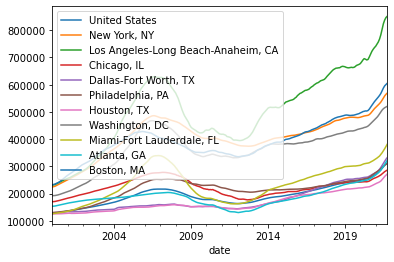

In [8]:
transform_2 = us_homeval.iloc[:, 0:11]
transform_2.plot()

### When did the median home price of Charlotte, NC surpass US median?

<AxesSubplot:xlabel='date'>

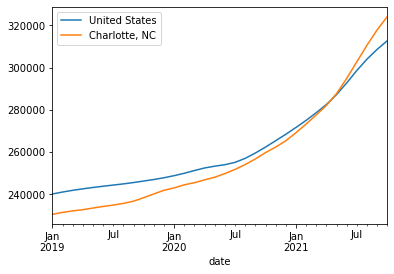

In [9]:
transform_3 = us_homeval.loc[us_homeval.index.year >= 2019, ['United States', 'Charlotte, NC']]
transform_3.plot()

### How does the growth of median house price in Charlotte-NC, and NewYork City-NY compare to US median from 2000 - 2021? 

In [10]:
growth_df = pd.DataFrame()
growth_df['US'] = us_homeval['United States'] / us_homeval.loc[us_homeval.index[0], ['United States']][0] * 100
growth_df['CLT'] = us_homeval['Charlotte, NC'] / us_homeval.loc[us_homeval.index[0], ['Charlotte, NC']][0] * 100
growth_df['NYC'] = us_homeval['New York, NY'] / us_homeval.loc[us_homeval.index[0], ['New York, NY']][0] * 100

In [11]:
growth_df

,US,CLT,NYC
date,,,
2000-01-31,100.000000,100.000000,100.000000
2000-02-29,100.270436,100.222067,100.597305
2000-03-31,100.555023,100.471724,101.134879
2000-04-30,101.134416,100.926624,102.193090
2000-05-31,101.719313,101.387580,103.178643
...,...,...,...
2021-06-30,230.130029,198.415924,242.136301
2021-07-31,234.754957,203.716589,245.671545
2021-08-31,238.996242,209.010525,249.057462


<AxesSubplot:xlabel='date'>

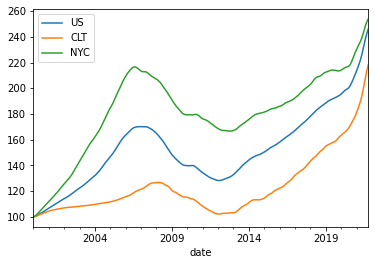

In [12]:
growth_df.plot() # transform_4

### By what percentage did the median home price in the US change from year 2000 - 2020 each year?

In [13]:
year_df = pd.DataFrame(us_homeval.loc[(us_homeval.index.month == 1), ['United States']])
year_df.rename(columns={'United States':'Jan'}, inplace=True)
year_df['Year'] = year_df.index.year
year_df.set_index('Year', inplace=True, drop=True)
year_df.drop([2021], inplace=True)
year_df['Dec'] = us_homeval[us_homeval.index.month == 12]['United States'].values
year_df['Growth'] = ((year_df['Dec'] - year_df['Jan']) / year_df['Jan']) * 100
year_df

,Jan,Dec,Growth
Year,,,
2000,127202.0,135035.0,6.157922
2001,135834.0,144559.0,6.423281
2002,145227.0,154878.0,6.645458
2003,155720.0,167074.0,7.291292
2004,168090.0,185170.0,10.161223
2005,186688.0,206910.0,10.831976
2006,208158.0,216492.0,4.003690
2007,216474.0,211093.0,-2.485749
2008,209855.0,190656.0,-9.148698


<AxesSubplot:xlabel='Year'>

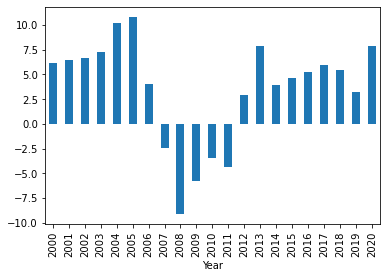

In [14]:
year_df['Growth'].plot(kind='bar') # transform_5

# Load
Loading transformed data into a view.

In [15]:
import plotly.express as px 
fig1 = px.line(transform_1, title='How has the median home price in the US changed from 2000-2021?', labels={'date': 'Year', 'value': 'Median Home Price'})
fig2 = px.line(transform_2, title='How does median home price of US compare to the top 10 largest cities?', labels={'date': 'Year', 'value': 'Median Home Price'})
fig3 = px.line(transform_3, title='When did the median home price of Charlotte, NC surpass US median?', labels={'date': 'Year', 'value': 'Median Home Price'})
fig4 = px.line(growth_df, title='How does the growth of median house price in Charlotte-NC, and New York City-NY compare to US median from 2000 - 2021?', labels={'date': 'Year', 'value': 'Median Home Price'})
fig5 = px.bar(year_df['Growth'], title='By what percentage did the median home price in the US change from year 2000 - 2020 each year?', labels={'date': 'Year', 'value': '% Change in Home Prices'})

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3),
    dcc.Graph(figure=fig4),
    dcc.Graph(figure=fig5)
    
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


<ipython-input-15-5941ec0698f6>:9: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-15-5941ec0698f6>:10: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

